In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Reading and Understanding

In [2]:
house=pd.read_csv('train.csv',keep_default_na=False,na_values=['NA'])
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data preparation and Visualisation

- Since Id column is of no use in analysis it's dropped

In [4]:
#Dropping Id column
subdrop=['Id']
house=house.drop(columns=subdrop,axis=1)

### Handling NA values

- Replacing the Na in the data with appropriate values as per Data Definition

In [5]:
basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
house['Alley'].fillna('NoAlley',inplace=True)
house['FireplaceQu'].fillna('NoFireplace',inplace=True)
house['PoolQC'].fillna('NoPool',inplace=True)
house['Fence'].fillna('NoFence',inplace=True)
house['MiscFeature'].fillna('NoMiscFeature',inplace=True)
for i in basement:
    house[i].fillna('NoBasement',inplace=True)
for i in garage:
    house[i].fillna('NoGarage',inplace=True)    
house['GarageYrBlt'].fillna(2024,inplace=True)
house.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- There are very few rows with Na values. So dropping those

In [6]:
#Dropping rows with Na values
house=house.dropna(axis=0,how='any')
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1194 non-null   int64  
 1   MSZoning       1194 non-null   object 
 2   LotFrontage    1194 non-null   float64
 3   LotArea        1194 non-null   int64  
 4   Street         1194 non-null   object 
 5   Alley          1194 non-null   object 
 6   LotShape       1194 non-null   object 
 7   LandContour    1194 non-null   object 
 8   Utilities      1194 non-null   object 
 9   LotConfig      1194 non-null   object 
 10  LandSlope      1194 non-null   object 
 11  Neighborhood   1194 non-null   object 
 12  Condition1     1194 non-null   object 
 13  Condition2     1194 non-null   object 
 14  BldgType       1194 non-null   object 
 15  HouseStyle     1194 non-null   object 
 16  OverallQual    1194 non-null   int64  
 17  OverallCond    1194 non-null   int64  
 18  YearBuilt    

In [7]:
house_col = house.select_dtypes(include=['int64','float64'])

cat_order=['Street','LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']
cat_unorder=['MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','SaleType','SaleCondition','Electrical','MiscFeature','MasVnrType']

scale_col = house_col.columns.tolist()+cat_order
final_list = list(set(scale_col))
final_list.remove('Street')
final_list.remove('CentralAir')
final_list.remove('YearBuilt')
final_list.remove('GarageYrBlt')
final_list.append('SalePrice')


- Deriving new columns mentioning the age of the building.

In [8]:
house['HouseAge']=2024 - house['YearBuilt']
#house['GarageAge']=2024 - house['GarageYrBlt']
house=house.drop(['YearBuilt','GarageYrBlt'],axis=1)


In [9]:
num_var=['LotFrontage','LotArea','HouseAge','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
num_cat=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

## Data Visualisation

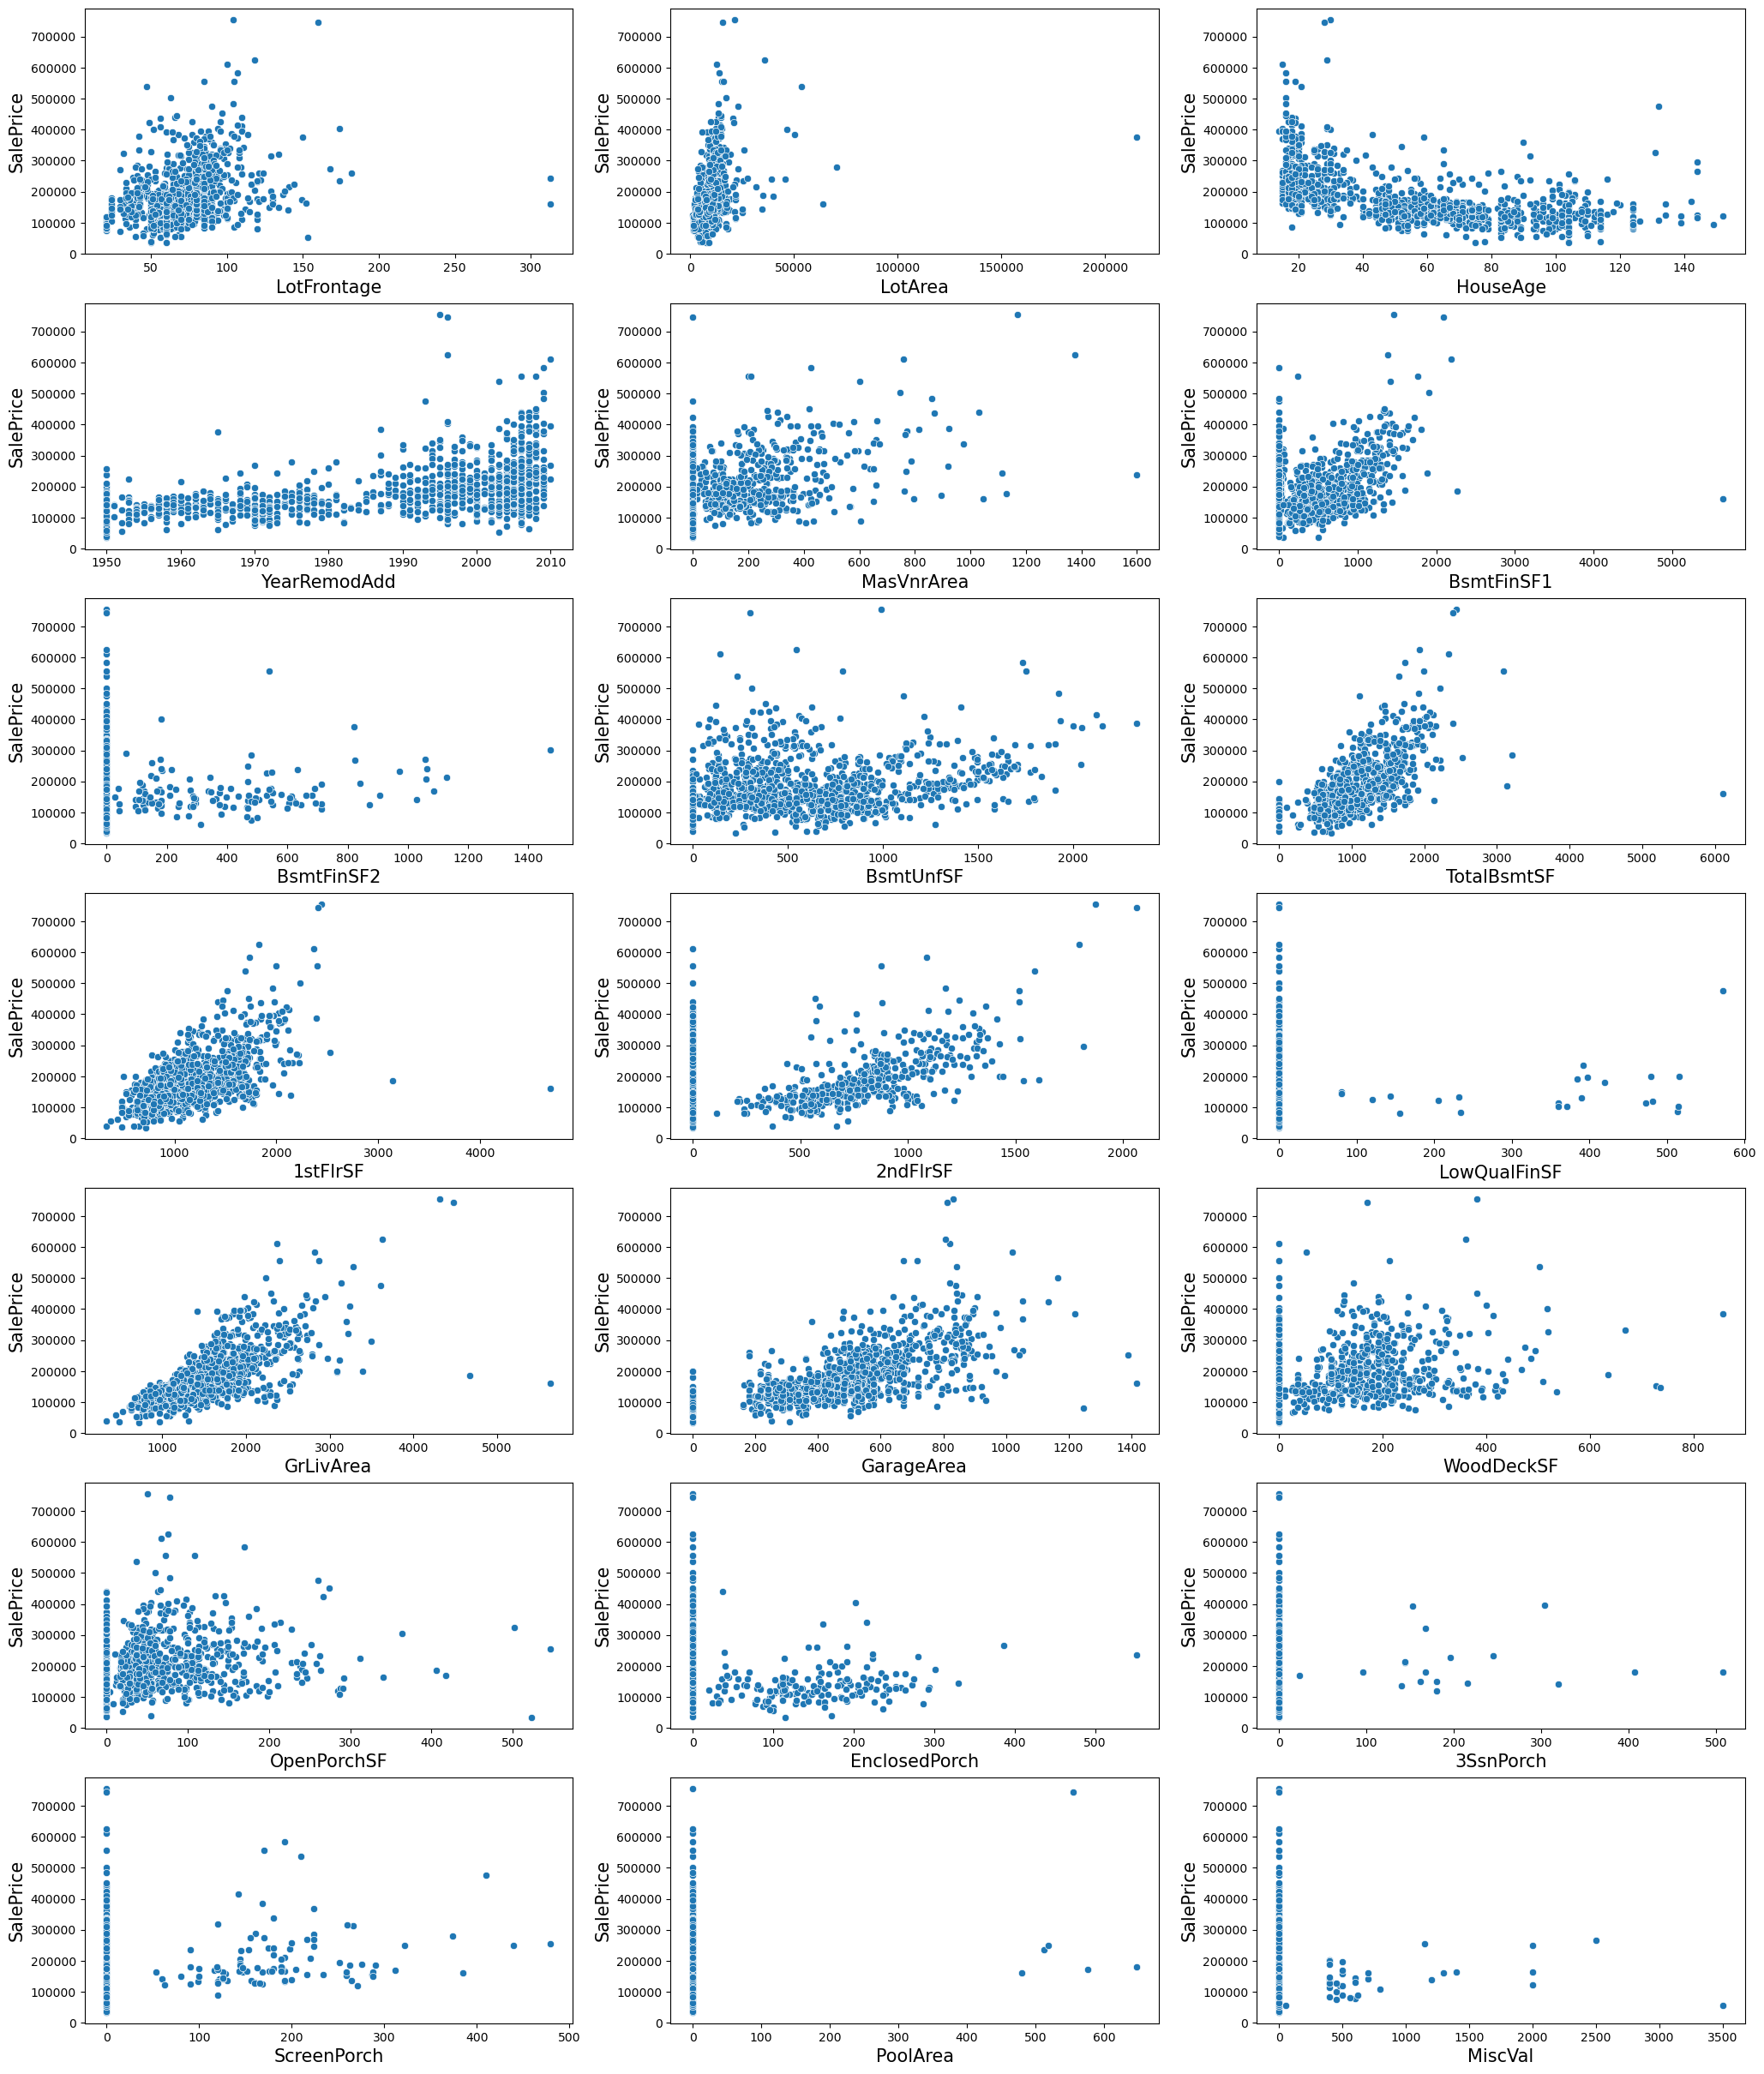

In [10]:

plt.figure(figsize=(25,35))
for i,num_col in list(enumerate(num_var)):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x = house[num_col], y = house['SalePrice'])
    plt.xlabel(num_col, fontsize=15)# X-label
    plt.ylabel('SalePrice', fontsize=15)
    
plt.show()



In [11]:
def draw_boxplot(col_var):
    plt.figure(figsize=(15,12))
    for i,num_col in list(enumerate(col_var)):
        plt.subplots_adjust(hspace = .3,wspace=0.2)
        plt.subplot(4,2,i+1)
        sns.boxplot(y=house['SalePrice'],x= house[num_col])
    plt.show()

def draw_countplot(col_var):
    plt.figure(figsize=(15,12))
    for i,num_col in list(enumerate(col_var)):
        plt.subplots_adjust(hspace = .4,wspace=0.2)
        plt.subplot(4,2,i+1)
        sns.countplot(house,x= num_col,stat='count')
    plt.show() 


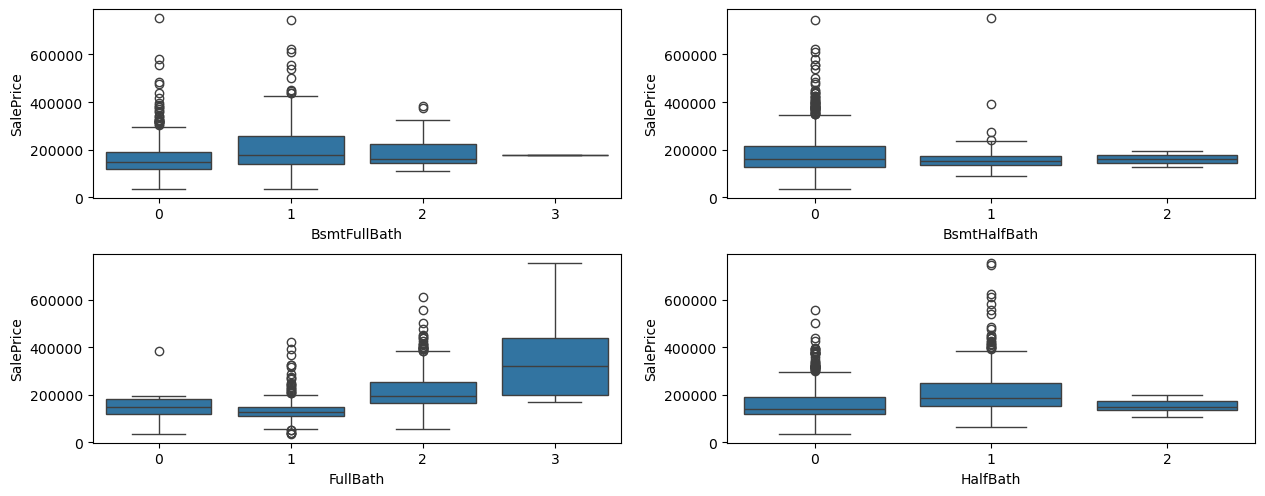

In [12]:
#cat_var=cat_order+cat_unorder
bath_det=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
draw_boxplot(bath_det)


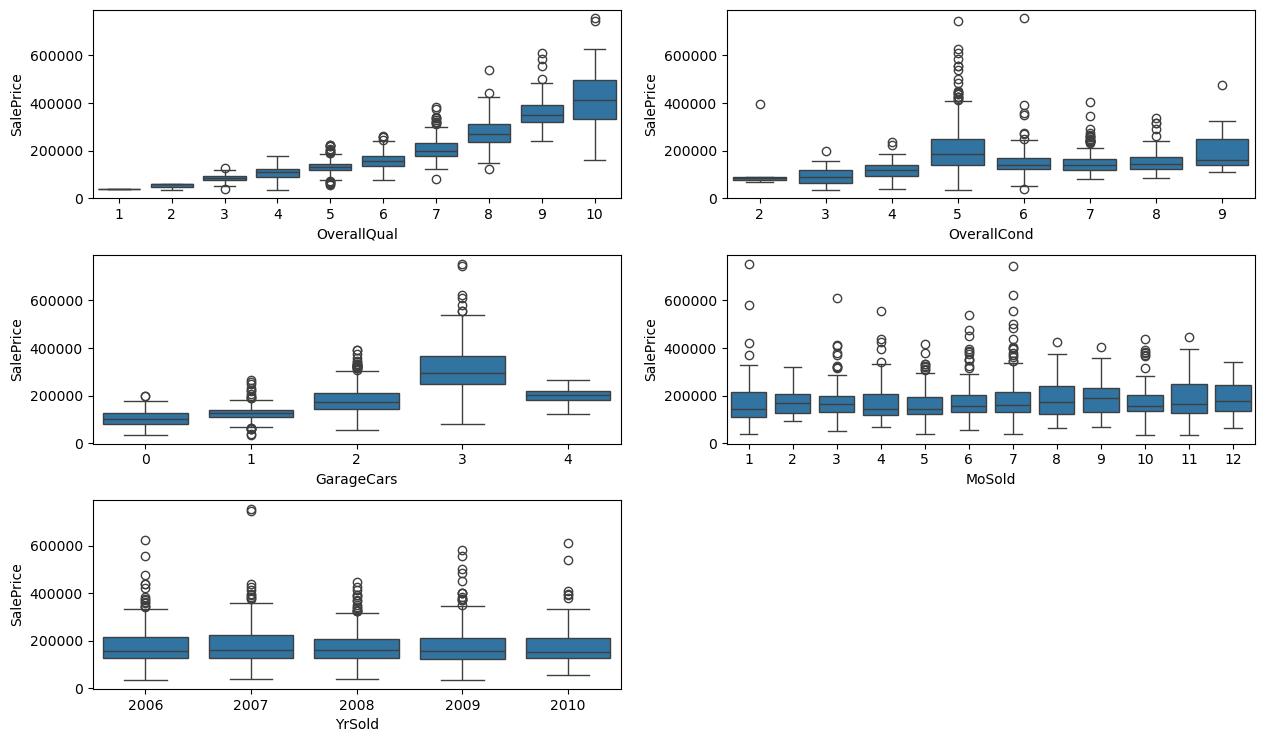

In [13]:
other_det=['OverallQual','OverallCond','GarageCars','MoSold','YrSold']
draw_boxplot(other_det)

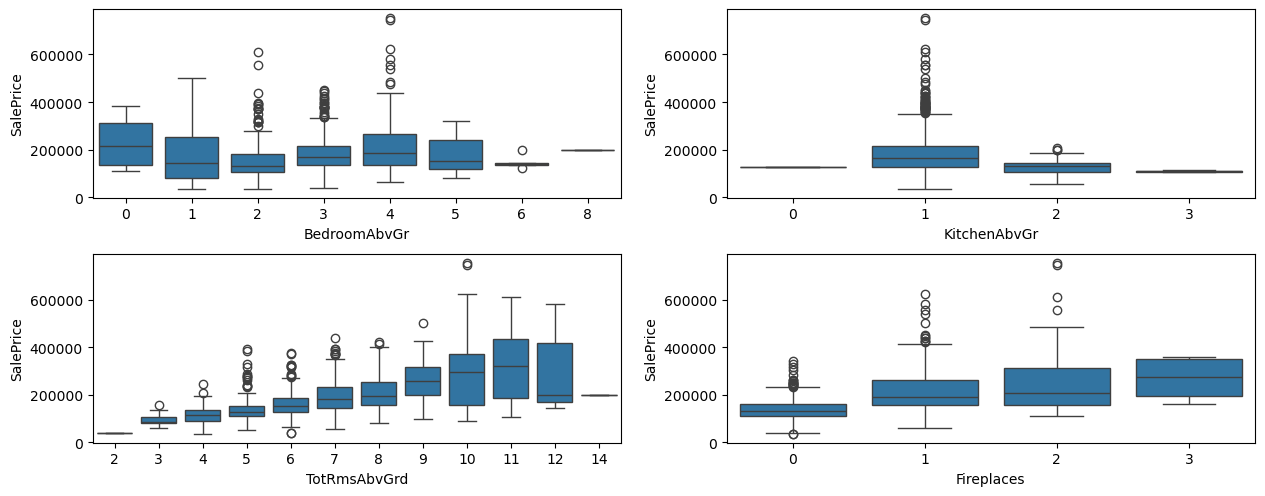

In [14]:
room_det=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
draw_boxplot(room_det)

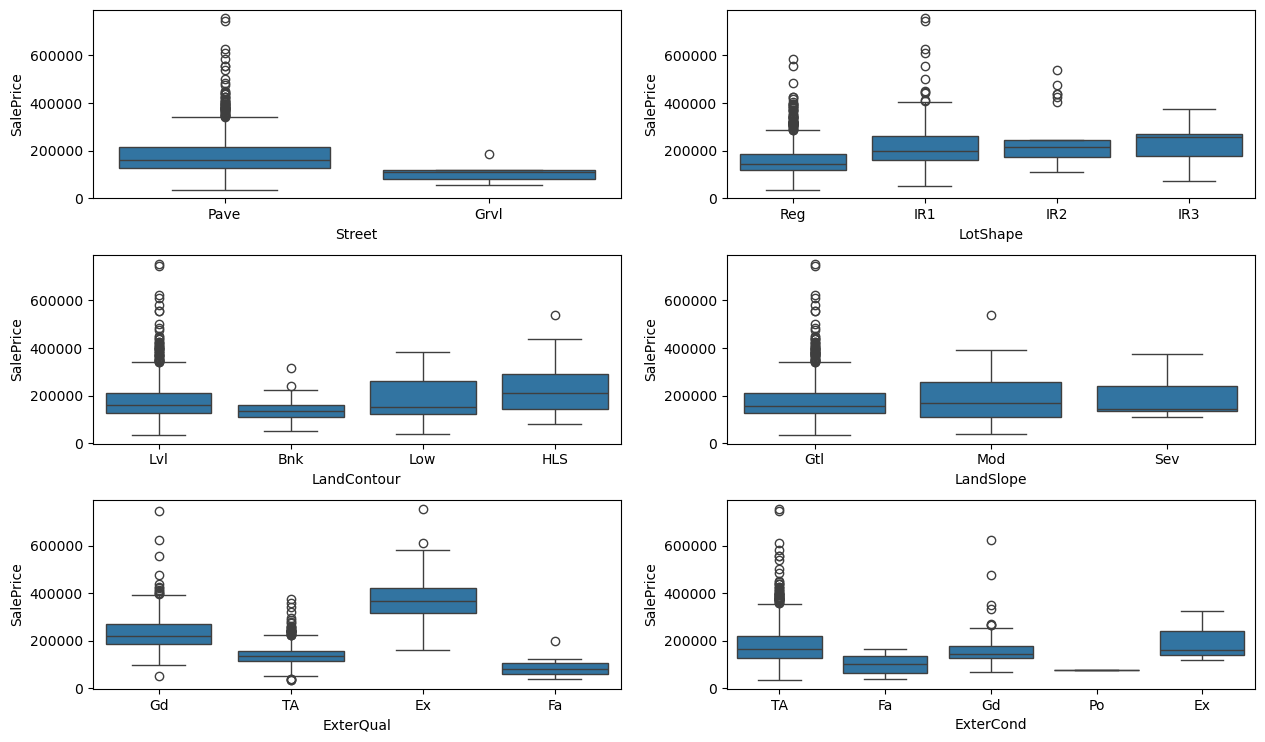

In [15]:
plot_det=['Street','LotShape','LandContour','LandSlope','ExterQual','ExterCond']
draw_boxplot(plot_det)


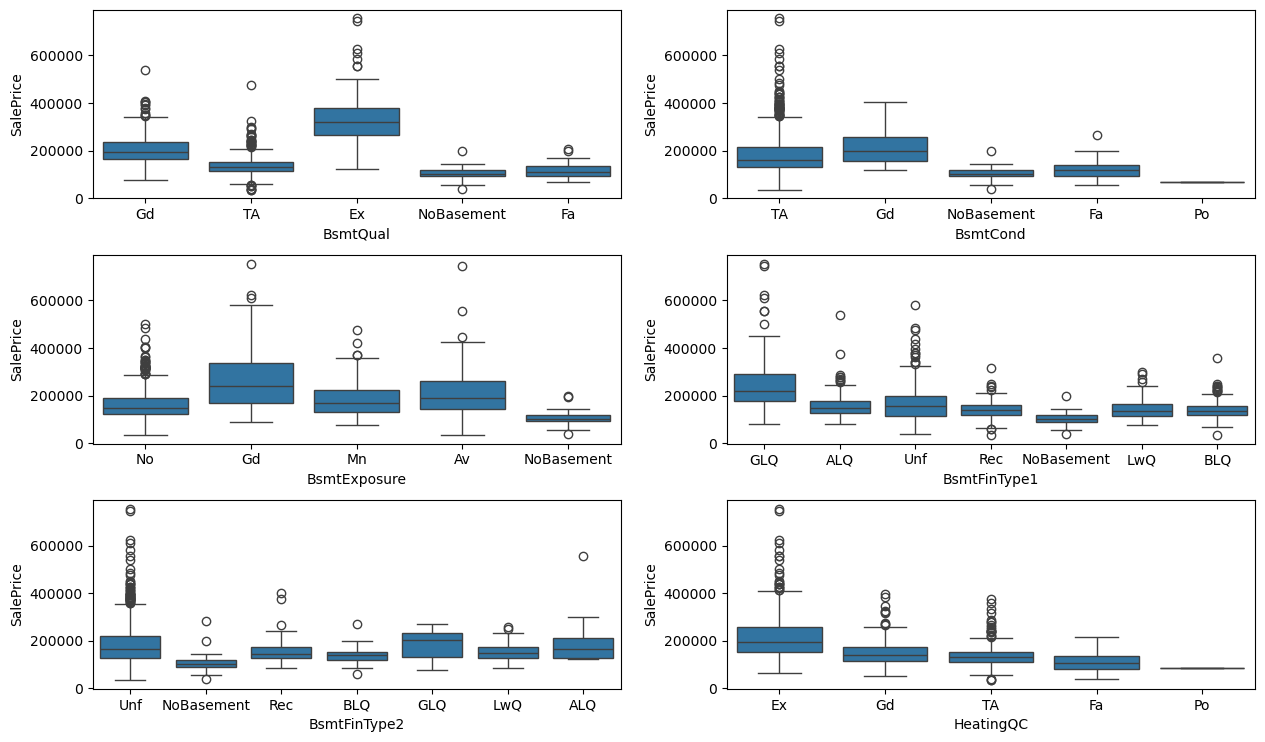

In [16]:
plot_det=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC']
draw_boxplot(plot_det)


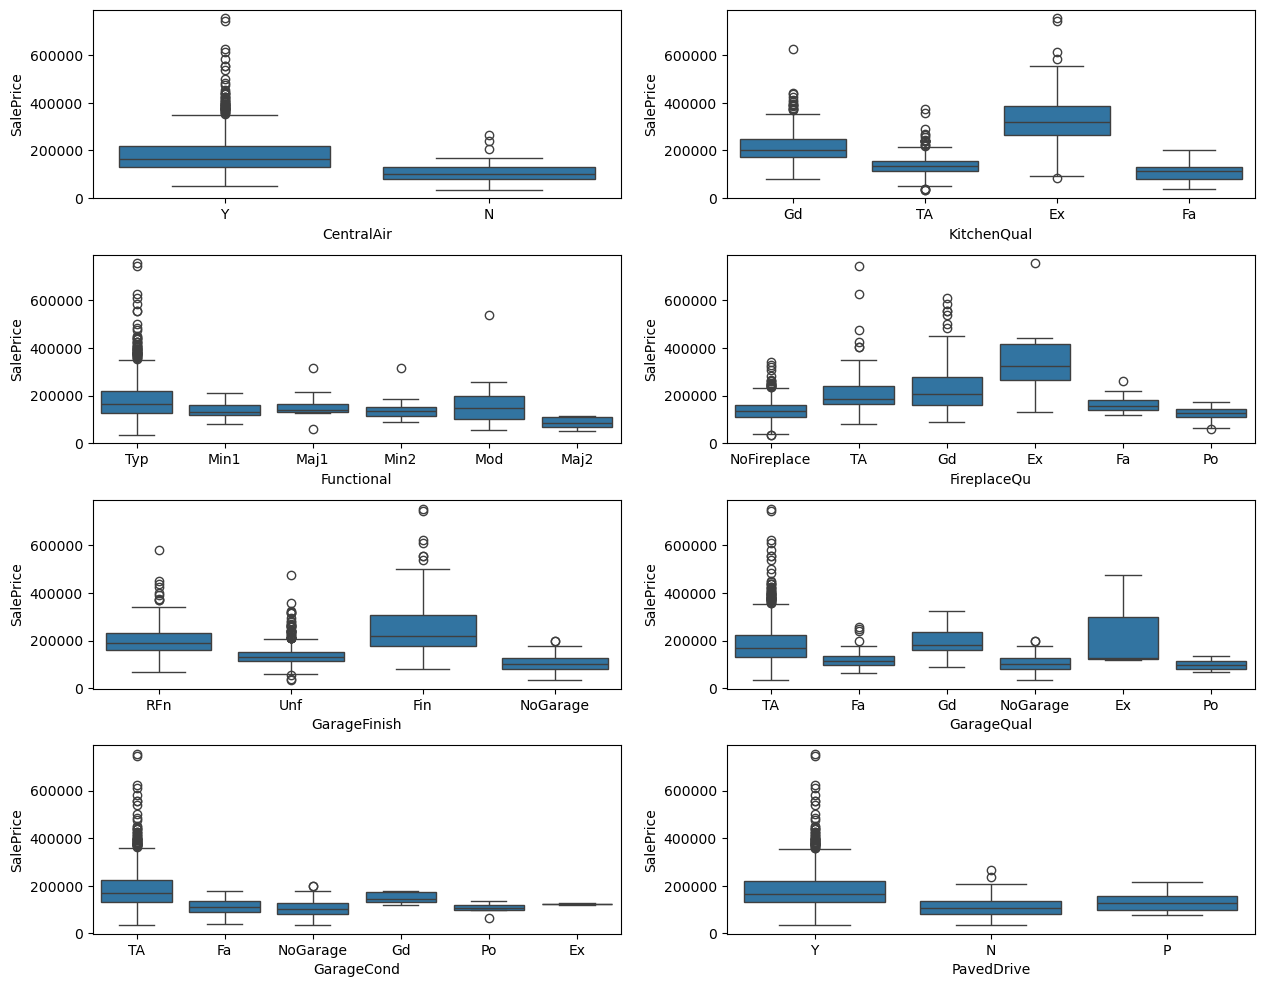

In [17]:
room_det=['CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']
draw_boxplot(room_det)

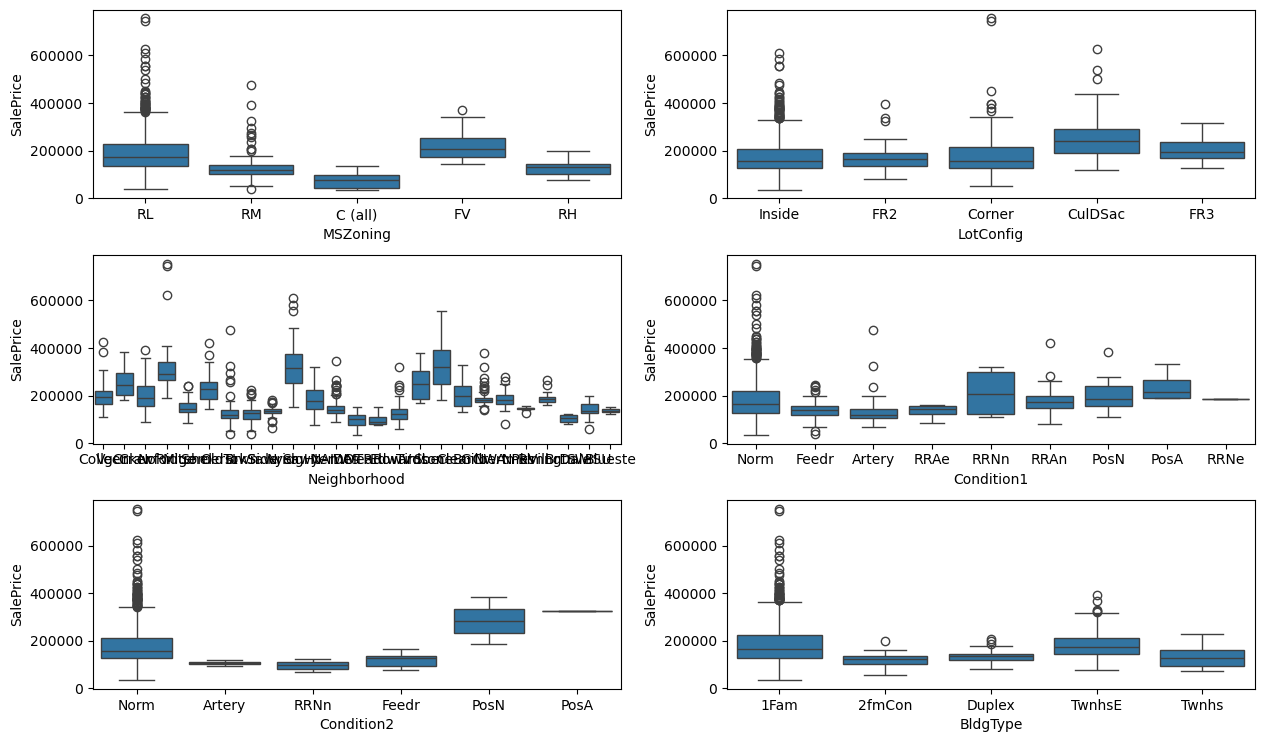

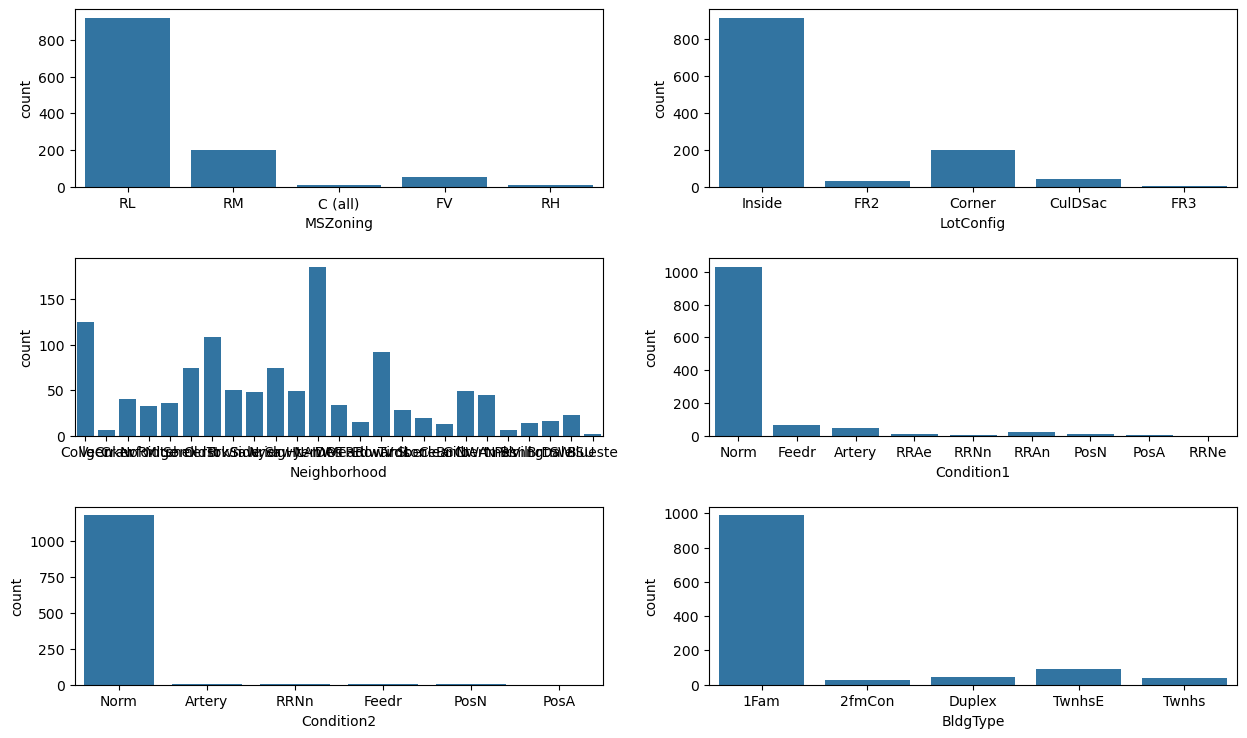

In [18]:
room_det=['MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType']
draw_boxplot(room_det)
draw_countplot(room_det)

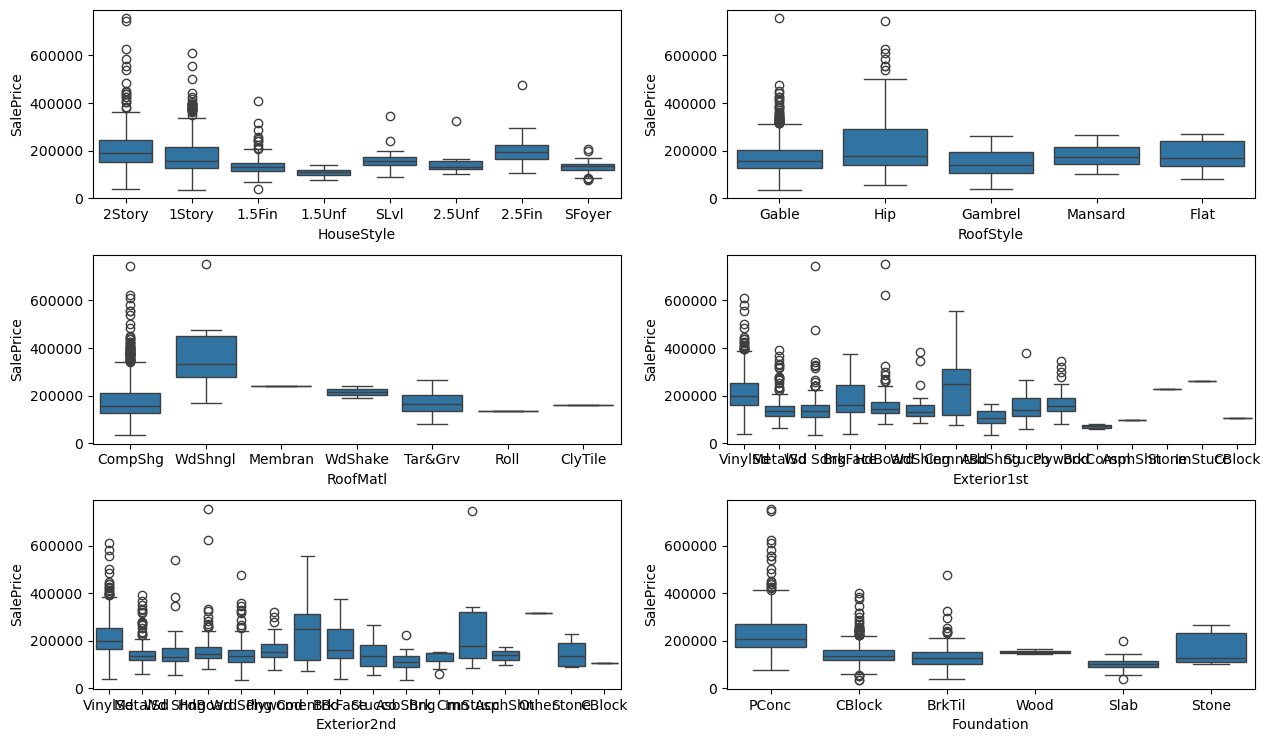

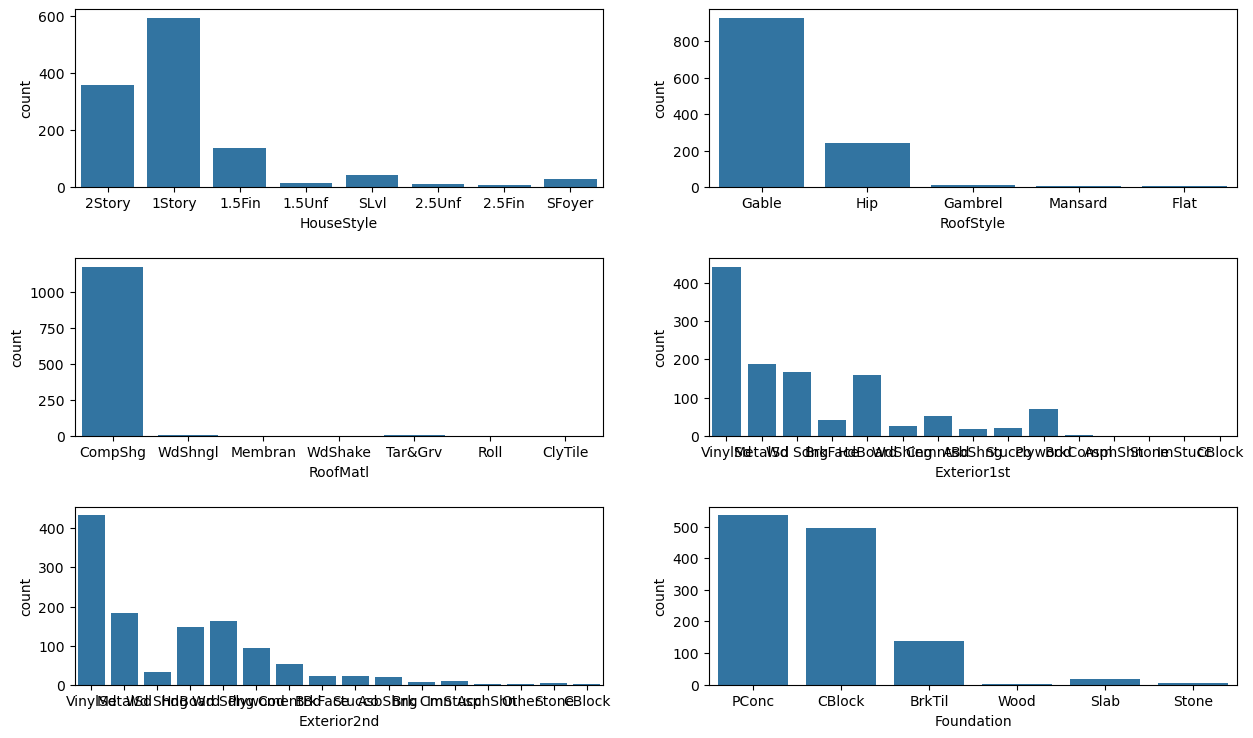

In [19]:
room_det=['HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation']
draw_boxplot(room_det)
draw_countplot(room_det)

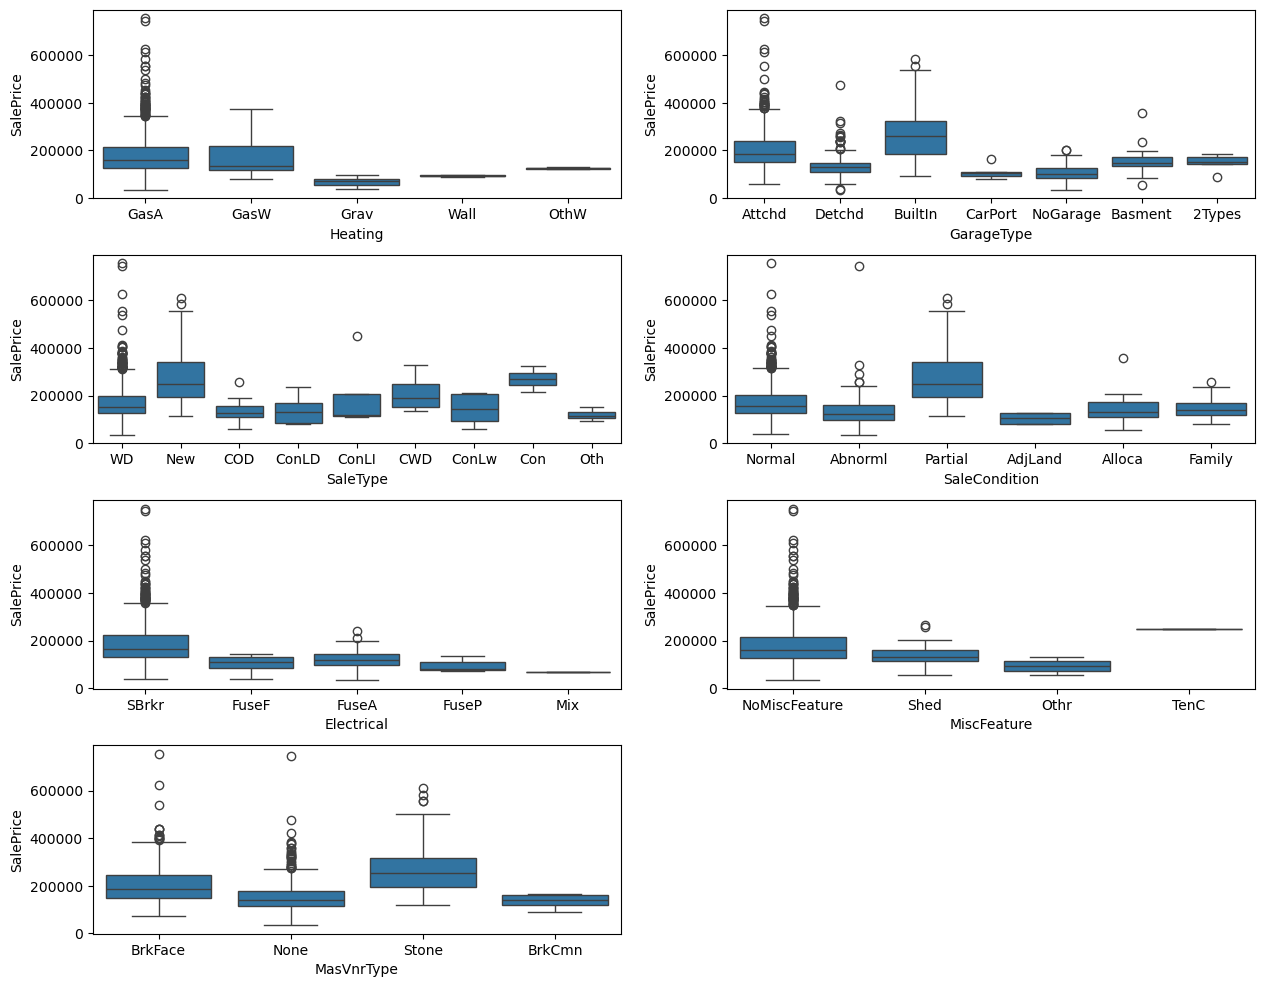

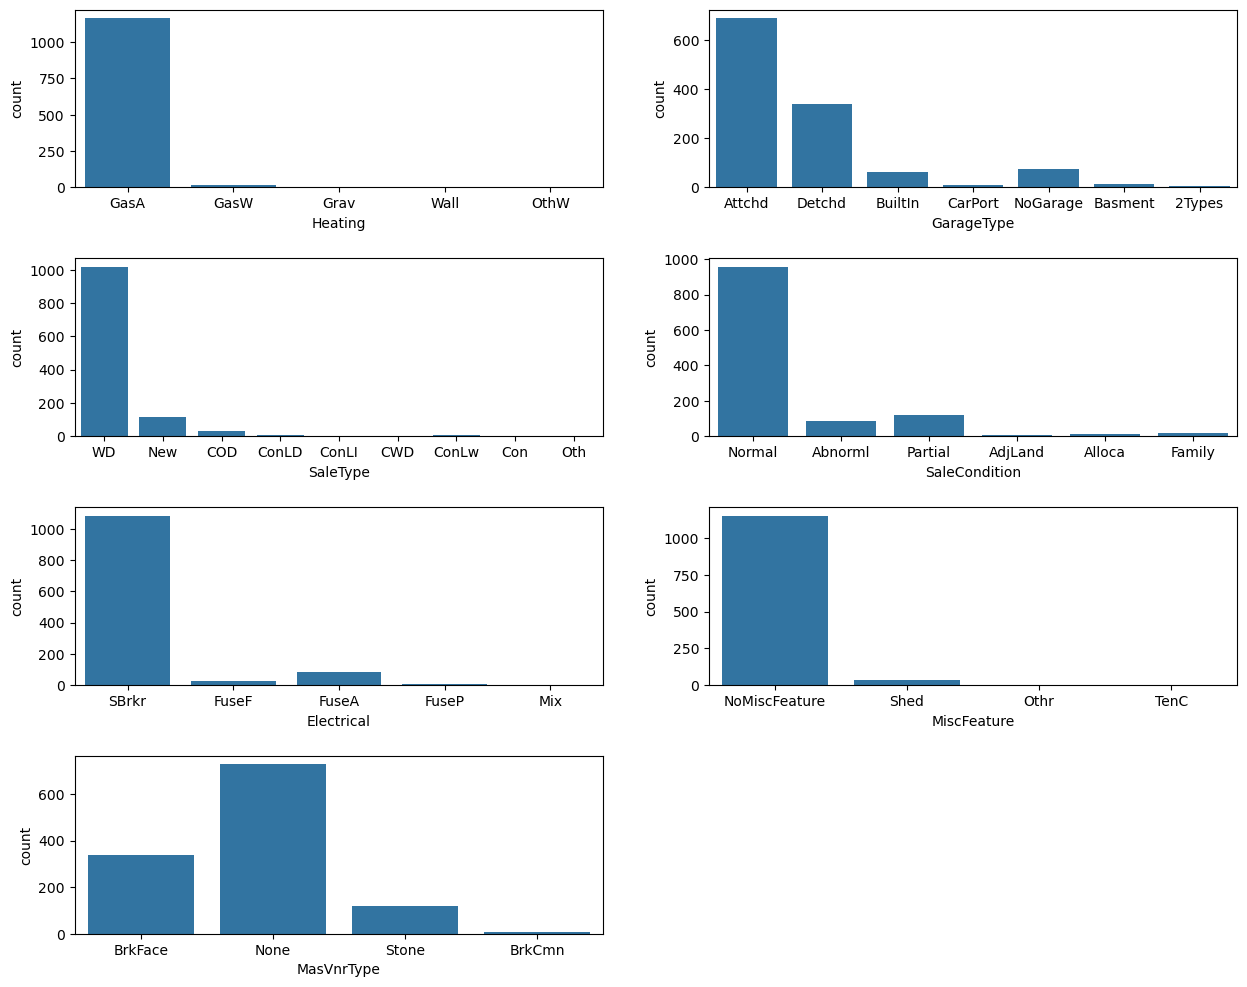

In [20]:
room_det=['Heating','GarageType','SaleType','SaleCondition','Electrical','MiscFeature','MasVnrType']
draw_boxplot(room_det)
draw_countplot(room_det)

#### Inferences
    - BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea has a linear relation with SalePrice(target variable)
    - Houses with full bath has higher SalePrice
    - Quality and Condition of the prpoerty plays important role in SalePrice

###### Generalising column values which are less than 10%


In [21]:
house['MSZoning'].replace(['C (all)','RH','FV'],'Others',inplace=True)
house['LotConfig'].replace(['FR2','CulDSac','FR3'],'Others',inplace=True)
house['Condition1'].replace(['Feedr', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosN', 'PosA','RRNe'],'Others',inplace=True)
house['Condition2'].replace(['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA'],'Others',inplace=True)
house['BldgType'].replace(['2fmCon', 'Duplex'],'Others',inplace=True)
house['BldgType'].replace(['TwnhsE', 'Twnhs'],'Townhouse',inplace=True)
house['HouseStyle'].replace([ '1.5Unf', 'SLvl', '2.5Unf', '2.5Fin','SFoyer'],'Others',inplace=True)
house['RoofStyle'].replace(['Gambrel', 'Mansard', 'Flat'],'Others',inplace=True)
house['RoofMatl'].replace(['WdShngl', 'Membran', 'WdShake', 'Tar&Grv', 'Roll','ClyTile'],'Others',inplace=True)
house['Exterior1st'].replace(['BrkFace', 'WdShing','CemntBd', 'AsbShng', 'Stucco','Plywood', 'BrkComm', 'AsphShn','Stone', 'ImStucc', 'CBlock'],'Others',inplace=True)
house['Exterior2nd'].replace(['Wd Shng','BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc','AsphShn', 'Other', 'Stone', 'CBlock'],'Others',inplace=True)
house['Foundation'].replace(['Wood', 'Slab', 'Stone'],'Others',inplace=True)
house['Heating'].replace([ 'GasW', 'Grav', 'Wall', 'OthW'],'Others',inplace=True)
house['GarageType'].replace(['BuiltIn', 'CarPort', 'Basment','2Types'],'Others',inplace=True)
house['SaleType'].replace(['COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],'Others',inplace=True)
house['SaleCondition'].replace(['AdjLand', 'Alloca', 'Family'],'Others',inplace=True)
house['Electrical'].replace(['FuseF', 'FuseA', 'FuseP', 'Mix'],'Others',inplace=True)
house['MiscFeature'].replace(['Shed', 'Othr', 'TenC'],'Others',inplace=True)

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1194 non-null   int64  
 1   MSZoning       1194 non-null   object 
 2   LotFrontage    1194 non-null   float64
 3   LotArea        1194 non-null   int64  
 4   Street         1194 non-null   object 
 5   Alley          1194 non-null   object 
 6   LotShape       1194 non-null   object 
 7   LandContour    1194 non-null   object 
 8   Utilities      1194 non-null   object 
 9   LotConfig      1194 non-null   object 
 10  LandSlope      1194 non-null   object 
 11  Neighborhood   1194 non-null   object 
 12  Condition1     1194 non-null   object 
 13  Condition2     1194 non-null   object 
 14  BldgType       1194 non-null   object 
 15  HouseStyle     1194 non-null   object 
 16  OverallQual    1194 non-null   int64  
 17  OverallCond    1194 non-null   int64  
 18  YearRemodAdd 

#### Creating Dummy variables

In [23]:
status = pd.get_dummies(house[cat_unorder], drop_first = True,dtype=int)
house = pd.concat([house, status], axis = 1)
house.drop(house[cat_unorder], axis = 1, inplace = True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 1459
Columns: 125 entries, MSSubClass to MasVnrType_Stone
dtypes: float64(2), int32(65), int64(34), object(24)
memory usage: 872.2+ KB


##### Converting ordered categorical columns into numerical columns

In [24]:
house['Utilities'] = house[['Utilities']].apply(lambda x : x.map({'AllPub' : 3, 'NoSewr' : 2,'NoSeWa':1,'ELO':0}))
house['PoolQC'] = house[['PoolQC']].apply(lambda x : x.map({'Ex' : 4, 'Gd' : 3,'TA':2,'Fa':1,'NoPool':0}))
house['Fence'] = house[['Fence']].apply(lambda x : x.map({'GdPrv' : 4, 'MnPrv' : 3,'GdWo':2,'MnWw':1,'NoFence':0}))
house['Alley'] = house[['Alley']].apply(lambda x : x.map({'Pave' : 2, 'Grvl' : 1,'NoAlley':0}))
house['Street'] = house[['Street']].apply(lambda x : x.map({'Pave' : 1, 'Grvl' : 0}))
house['LotShape'] = house[['LotShape']].apply(lambda x : x.map({'Reg' : 3, 'IR1' : 2,'IR2':1,'IR3':0}))
house['LandContour'] = house[['LandContour']].apply(lambda x : x.map({'Lvl' : 3, 'Bnk' :2, 'HLS' :1 ,'Low':0 }))
house['LandSlope'] = house[['LandSlope']].apply(lambda x : x.map({'Gtl' : 0, 'Mod' : 1,'Sev':2}))
house['ExterQual'] = house[['ExterQual']].apply(lambda x : x.map({'Ex' : 4, 'Gd' : 3,'TA':2,'Fa':1,'Po':0}))
house['ExterCond'] = house[['ExterCond']].apply(lambda x : x.map({'Ex' : 4, 'Gd' : 3,'TA':2,'Fa':1,'Po':0}))
house['BsmtQual'] = house[['BsmtQual']].apply(lambda x : x.map({'Ex' : 5, 'Gd' : 4,'TA':3,'Fa':2,'Po':1,'NoBasement':0}))
house['BsmtCond'] = house[['BsmtCond']].apply(lambda x : x.map({'Ex' : 5, 'Gd' : 4,'TA':3,'Fa':2,'Po':1,'NoBasement':0}))
house['BsmtExposure'] = house[['BsmtExposure']].apply(lambda x : x.map({'Gd' : 4, 'Av' : 3,'Mn':2,'No':1,'NoBasement':0}))
house['BsmtFinType1'] = house[['BsmtFinType1']].apply(lambda x : x.map({'GLQ':6,'ALQ' : 5, 'BLQ' : 4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0}))
house['BsmtFinType2'] = house[['BsmtFinType2']].apply(lambda x : x.map({'GLQ':6,'ALQ' : 5, 'BLQ' : 4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0}))
house['HeatingQC'] = house[['HeatingQC']].apply(lambda x : x.map({'Ex' : 4, 'Gd' : 3,'TA':2,'Fa':1,'Po':0}))
house['CentralAir'] = house[['CentralAir']].apply(lambda x : x.map({'Y' : 1, 'N' : 0}))
house['KitchenQual'] = house[['KitchenQual']].apply(lambda x : x.map({'Ex' : 4, 'Gd' : 3,'TA':2,'Fa':1,'Po':0}))
house['Functional'] = house[['Functional']].apply(lambda x : x.map({'Typ':7,'Min1':6,'Min2':5,'Mod' : 4, 'Maj1' : 3,'Maj2':2,'Sev':1,'Sal':0}))
house['FireplaceQu'] = house[['FireplaceQu']].apply(lambda x : x.map({'Ex' : 5, 'Gd' : 4,'TA':3,'Fa':2,'Po':1,'NoFireplace':0}))
house['GarageFinish'] = house[['GarageFinish']].apply(lambda x : x.map({'Fin' : 3, 'RFn' : 2,'Unf':1,'NoGarage':0}))
house['GarageQual'] = house[['GarageQual']].apply(lambda x : x.map({'Ex' : 5, 'Gd' : 4,'TA':3,'Fa':2,'Po':1,'NoGarage':0}))
house['GarageCond'] = house[['GarageCond']].apply(lambda x : x.map({'Ex' : 5, 'Gd' : 4,'TA':3,'Fa':2,'Po':1,'NoGarage':0}))
house['PavedDrive'] = house[['PavedDrive']].apply(lambda x : x.map({'Y' : 2, 'P' : 1,'N':0}))



In [25]:
house.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,Condition2_Others,BldgType_Others,BldgType_Townhouse,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,RoofMatl_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_Others,Foundation_PConc,Heating_Others,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,Electrical_SBrkr,MiscFeature_Others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,65.0,8450,1,0,3,3,3,0,7,5,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,208500,21,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,20,80.0,9600,1,0,3,3,3,0,6,8,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,181500,48,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
2,60,68.0,11250,1,0,2,3,3,0,7,5,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,223500,23,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
3,70,60.0,9550,1,0,2,3,3,0,7,5,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,2,2006,140000,109,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,60,84.0,14260,1,0,2,3,3,0,8,5,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,12,2008,250000,24,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0


## Splitting train and test data

In [26]:
# train and test split
df_train,df_test = train_test_split(house,train_size=0.8,test_size = 0.2,random_state=100)

In [27]:
#scaling the data using MinMaxscaler
scaler = MinMaxScaler()
df_train[final_list] = scaler.fit_transform(df_train[final_list])

In [28]:
y_train=df_train.pop('SalePrice')
X_train=df_train


In [29]:
df_test[final_list] = scaler.transform(df_test[final_list])
y_test=df_test.pop('SalePrice')
X_test=df_test

## Building Models

#### Linear Regression model

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# selecting 40 features through RFE
rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train, y_train)

In [31]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:12:47   Log-Likelihood:                 1614.1
No. Observations:                 955   AIC:                            -3148.
Df Residuals:                     915   BIC:                            -2954.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2090      0.036     -5.769      0.000      -0.280      -0.138
MSSubClass              -0.0228      0.014     -1.591      0.112      -0.051       0.005
LotFrontage             -0.0639      0.025     -2.533      0.011      -0.113      -0.014
LotArea                  0.1487      0.043      3.423      0.001       0.063       0.234
Street                   0.0479      0.027      1.750      0.080      -0.006       0.102
OverallQual              0.1445      0.019      7.620      0.000       0.107       0.182
OverallCond              0.0289      0.011      2.621      0.009       0.007       0.050
MasVnrArea               0.0474      0.016      2.921      0.004       0.016       0.079
ExterQual                0.0430      0.014      3.122      0.002       0.016       0.070
BsmtQual                 0.0886      0.017      5.326      0.000       0.056       0.121
BsmtCond                -0.0488      0.016     -3.027      0.003      -0.080      -0.017
BsmtExposure             0.0454      0.007      6.527      0.000       0.032       0.059
BsmtFinSF1              -0.0449      0.040     -1.118      0.264      -0.124       0.034
BsmtUnfSF               -0.0520      0.016     -3.229      0.001      -0.084      -0.020
1stFlrSF                 0.1604      0.025      6.347      0.000       0.111       0.210
2ndFlrSF                 0.0889      0.015      6.032      0.000       0.060       0.118
LowQualFinSF             0.0235      0.017      1.390      0.165      -0.010       0.057
GrLivArea                0.1688      0.020      8.243      0.000       0.129       0.209
BsmtFullBath             0.0232      0.012      1.889      0.059      -0.001       0.047
FullBath                 0.0283      0.012      2.301      0.022       0.004       0.052
BedroomAbvGr            -0.0338      0.023     -1.477      0.140      -0.079       0.011
KitchenAbvGr            -0.0789      0.028     -2.864      0.004      -0.133      -0.025
KitchenQual              0.0362      0.011      3.412      0.001       0.015       0.057
TotRmsAbvGrd             0.0461      0.024      1.894      0.059      -0.002       0.094
Functional               0.0248      0.012      2.103      0.036       0.002       0.048
GarageCars               0.0779      0.013      5.820      0.000       0.052       0.104
GarageQual               0.0829      0.030      2.757      0.006       0.024       0.142
3SsnPorch                0.0310      0.024      1.297      0.195      -0.016       0.078
ScreenPorch              0.0218      0.013      1.746      0.081      -0.003       0.046
PoolArea                -0.0323      0.027     -1.190      0.234      -0.086       0.021
MiscVal                  0.0232      0.028      0.831      0.406      -0.032       0.078
Neighborhood_Crawfor     0.0384      0.008      4.522    

- LR gives a R2 score of 85%
- Model is not further iterated because, it will be only used for comparison further

### Ridge Regression

In [32]:
#trying out with different alpha values using cross validation
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 7.0}


- Building Ridge model with best alpha value retrieved - 7

In [33]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-0.02989996  0.00678203  0.02847301  0.01117737  0.11641132  0.02116242
  0.05169729  0.06033685  0.0627188  -0.02341697  0.04928451  0.03284068
 -0.01443976  0.06555276  0.06957159  0.0163083   0.08264367  0.02908589
  0.04895496 -0.00097895 -0.0284829   0.05463046  0.05960049  0.01414624
  0.06892702  0.01934265  0.01128828  0.02543232 -0.00163218  0.00253628
  0.035237    0.06830354  0.05349618  0.07156171  0.01997371 -0.01946407
 -0.01295099  0.01786289  0.01766586 -0.00433818]


In [34]:
X_test=X_test[col]
X_test.shape

(239, 40)

In [35]:
# Calculating metric values for Ridge model

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

0.8381384175312806
0.8675370933286236
2.080471506325198
0.4072333783929427
0.002178504195104919
0.0017039053489244465


### Lasso Regression

In [36]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


- Building Lasso model with best alpha value derived from cross validation

In [37]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([-0.02923608, -0.01243142,  0.06111969,  0.00695277,  0.15873211,
        0.02795603,  0.04315286,  0.04704164,  0.07629817, -0.0383849 ,
        0.04616925,  0.        , -0.03898169,  0.        ,  0.02052832,
        0.        ,  0.3037079 ,  0.01963745,  0.02977756, -0.0006358 ,
       -0.04443913,  0.03907229,  0.03111484,  0.01557255,  0.07398693,
        0.02241689,  0.00333931,  0.01903661, -0.00436674,  0.        ,
        0.03559479,  0.07309908,  0.05779503,  0.09036285,  0.02235229,
       -0.02877497, -0.01385739,  0.02209591,  0.02839482, -0.00305653])

In [38]:
# Calculating metrics for lasso model
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.8477498362895242
0.873198456190304
1.956932105826938
0.3898285366723085
0.00204914356631093
0.0016310817433987802


In [39]:
rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': ridge_metric
        }
rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.838138,0.847750
1,R2 Score (Test),0.867537,0.873198
2,RSS (Train),2.080472,1.956932
3,RSS (Test),0.407233,0.389829
4,MSE (Train),0.046674,0.045267
5,MSE (Test),0.041278,0.040387


In [40]:
betas = pd.DataFrame(index=X_train_rfe.columns) 
betas['Lasso']=lasso.coef_
betas['Ridge']=ridge.coef_
print(betas)
zero_lasso=betas[betas['Lasso']==0].index
zero_lasso

                         Lasso     Ridge
MSSubClass           -0.029236 -0.029900
LotFrontage          -0.012431  0.006782
LotArea               0.061120  0.028473
Street                0.006953  0.011177
OverallQual           0.158732  0.116411
OverallCond           0.027956  0.021162
MasVnrArea            0.043153  0.051697
ExterQual             0.047042  0.060337
BsmtQual              0.076298  0.062719
BsmtCond             -0.038385 -0.023417
BsmtExposure          0.046169  0.049285
BsmtFinSF1            0.000000  0.032841
BsmtUnfSF            -0.038982 -0.014440
1stFlrSF              0.000000  0.065553
2ndFlrSF              0.020528  0.069572
LowQualFinSF          0.000000  0.016308
GrLivArea             0.303708  0.082644
BsmtFullBath          0.019637  0.029086
FullBath              0.029778  0.048955
BedroomAbvGr         -0.000636 -0.000979
KitchenAbvGr         -0.044439 -0.028483
KitchenQual           0.039072  0.054630
TotRmsAbvGrd          0.031115  0.059600
Functional      

Index(['BsmtFinSF1', '1stFlrSF', 'LowQualFinSF', 'MiscVal'], dtype='object')

- In comparison of both models, Lasso model has slightly better r2score and other metrics.
- So, choosing Lasso model
- 'BsmtFinSF1', 'GarageCond', 'PoolArea', 'PoolQC', 'MiscVal' columns hav zero alpha value. So removing those

In [41]:
X=X_train_rfe.drop(columns=zero_lasso,axis=1)
betas.drop(index=zero_lasso,axis=0,inplace=True)

In [42]:
print(X.shape)
print(X.columns)

(955, 36)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageCars', 'GarageQual', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition2_Others', 'BldgType_Townhouse',
       'HouseStyle_1Story', 'GarageType_NoGarage', 'SaleType_Others'],
      dtype='object')


In [43]:
betas[['Lasso']].sort_values(by='Lasso', ascending=False)

,Lasso
GrLivArea,0.303708
OverallQual,0.158732
Neighborhood_StoneBr,0.090363
BsmtQual,0.076298
GarageCars,0.073987
Neighborhood_NoRidge,0.073099
LotArea,0.061120
Neighborhood_NridgHt,0.057795
ExterQual,0.047042
BsmtExposure,0.046169


### Inferences
- Best variables to define Sale price of a property are **['LotArea', 'Street', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageCars', 'GarageQual', '3SsnPorch',
       'ScreenPorch', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Townhouse',
       'HouseStyle_1Story', 'GarageType_NoGarage']**
- SalePrice increases with increase in squarefeet(GrlivArea)
- Good or Best quality fetches great SalePrice.Increased value in OverallQual, BsmtQual,KitchenQual,GarageQual would have a good SalePrice
- Property around  Neighbourhood like NoRidge, NridgHt, StoneBr has good SalePrice
- Houses having many number of rooms have high demand.
- Properties with amenities like LotArea, Garage, Fireplace has higher price
-  BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea has a linear relation with SalePrice(target variable)
- Houses with full bath has higher SalePrice
- Quality and Condition of the prpoerty plays important role in SalePrice

### Subjective QA

- The best alpha value for ridge is 7. So double its value is 14
- The best alpha value for lasso is .0001. So double it's value is .0002

In [44]:
alpha = 14

ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=14)

In [45]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [46]:
betas = pd.DataFrame(index=X_train_rfe.columns) 
betas['Lasso']=lasso.coef_
betas['Ridge']=ridge.coef_
print(betas.sort_values(by='Lasso', ascending=False).head(1))
print(betas.sort_values(by='Ridge', ascending=False).head(1))

              Lasso     Ridge
GrLivArea  0.297613  0.067894
                Lasso     Ridge
OverallQual  0.168454  0.099665


- In comparison of both models, Lasso model has slightly better r2score and other metrics.
- So, choosing Lasso model

In [47]:
drop_col=['GrLivArea','OverallQual','Neighborhood_StoneBr','BsmtQual','GarageCars']
X_train_new=X_train_rfe.drop(drop_col,axis=1)


In [48]:
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [49]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 


Lasso(alpha=0.0001)

In [50]:
betas = pd.DataFrame(index=X_train_new.columns) 
betas['Lasso']=lasso.coef_
print(betas.sort_values(by='Lasso', ascending=False).head(5))

                         Lasso
1stFlrSF              0.303661
2ndFlrSF              0.167795
ExterQual             0.109427
KitchenQual           0.075518
Neighborhood_NoRidge  0.072270
